## CIFAR-10 데이터셋
  - 10개의 클래스로 이루어져 있으며, 레이블은 0~9로 구성 되어있다.
  - MNIST 데이터셋과 함께 기본적으로 사용되는 데이터셋이지만, MNIST 데이터셋만큼의 성능 기대 힘듬
  - 5만개 학습 데이터 , 1만개 테스트 데이터

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


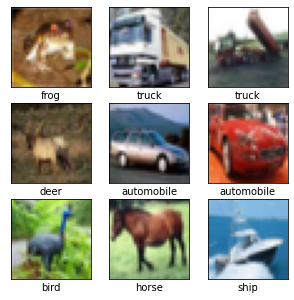

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
sample_size = 9
random_idx = np.random.randint(60000, size=sample_size)
plt.figure(figsize = (5,5))
for i, idx in enumerate(random_idx):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])
  plt.xlabel(class_names[int(y_train[i])])
plt.show()

## 전처리
체널별로 표준편차 구함

In [ ]:
# 펴균과 표준편차는 채널별로 구해줍니다.
x_mean = np.mean(x_train, axis = (0, 1, 2))
x_std = np.std(x_train, axis = (0, 1, 2))

x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size = 0.3,
                                                  random_state = 777)

print(x_train.shape, len(y_train))
print(x_val.shape, len(y_val))

(35000, 32, 32, 3) 35000
(15000, 32, 32, 3) 15000


## 신경망 학습시키기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))


model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))


model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = Adam(1e-4),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [ ]:
history = model.fit(x_train, y_train,
                    epochs = 20,
                    batch_size = 32,
                    validation_data = (x_val, y_val))

Epoch 1/20
1094/1094 [==============================] - 8s 7ms/step - loss: 1.6115 - acc: 0.4171 - val_loss: 1.3422 - val_acc: 0.5145
Epoch 2/20
1094/1094 [==============================] - 7s 6ms/step - loss: 1.2579 - acc: 0.5547 - val_loss: 1.1656 - val_acc: 0.5848
Epoch 3/20
1094/1094 [==============================] - 7s 6ms/step - loss: 1.0836 - acc: 0.6197 - val_loss: 1.0306 - val_acc: 0.6340
Epoch 4/20
1094/1094 [==============================] - 7s 6ms/step - loss: 0.9564 - acc: 0.6667 - val_loss: 0.9983 - val_acc: 0.6434
Epoch 5/20
1094/1094 [==============================] - 7s 6ms/step - loss: 0.8569 - acc: 0.7017 - val_loss: 0.8889 - val_acc: 0.6849
Epoch 6/20
1094/1094 [==============================] - 7s 6ms/step - loss: 0.7705 - acc: 0.7340 - val_loss: 0.8747 - val_acc: 0.6915
Epoch 7/20
1094/1094 [==============================] - 7s 6ms/step - loss: 0.6982 - acc: 0.7609 - val_loss: 0.8193 - val_acc: 0.7129
Epoch 8/20
1094/1094 [==============================] - 7s 6ms

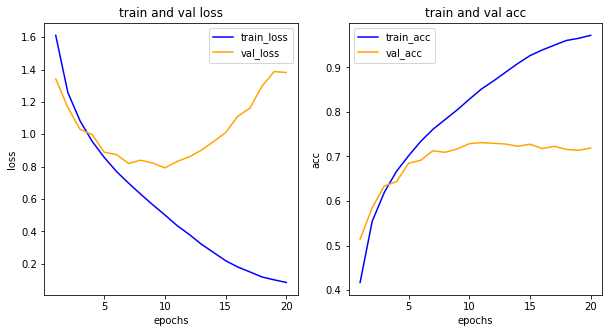

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize = (10,5))
# 학습 및 검증 손실 그리기

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss , color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

## 신경망 시각화 해보기

In [ ]:
import tensorflow as tf

get_layer_name = [layer.name for layer in model.layers]
get_output = [layer.output for layer in model.layers]
print('층이름 :' , get_layer_name)
print('출력층이름 :' , get_output)
from tensorflow.keras.utils import plot_model
plot_model(model, './model.png', show_shapes =True)

층이름 : ['conv2d', 'conv2d_1', 'max_pooling2d', 'conv2d_2', 'conv2d_3', 'max_pooling2d_1', 'conv2d_4', 'conv2d_5', 'max_pooling2d_2', 'flatten', 'dense', 'dense_1']
출력층이름 : [<KerasTensor: shape=(None, 32, 32, 32) dtype=float32 (created by layer 'conv2d')>, <KerasTensor: shape=(None, 32, 32, 32) dtype=float32 (created by layer 'conv2d_1')>, <KerasTensor: shape=(None, 16, 16, 32) dtype=float32 (created by layer 'max_pooling2d')>, <KerasTensor: shape=(None, 16, 16, 64) dtype=float32 (created by layer 'conv2d_2')>, <KerasTensor: shape=(None, 16, 16, 64) dtype=float32 (created by layer 'conv2d_3')>, <KerasTensor: shape=(None, 8, 8, 64) dtype=float32 (created by layer 'max_pooling2d_1')>, <KerasTensor: shape=(None, 8, 8, 128) dtype=float32 (created by layer 'conv2d_4')>, <KerasTensor: shape=(None, 8, 8, 128) dtype=float32 (created by layer 'conv2d_5')>, <KerasTensor: shape=(None, 4, 4, 128) dtype=float32 (created by layer 'max_pooling2d_2')>, <KerasTensor: shape=(None, 2048) dtype=float32 (cre

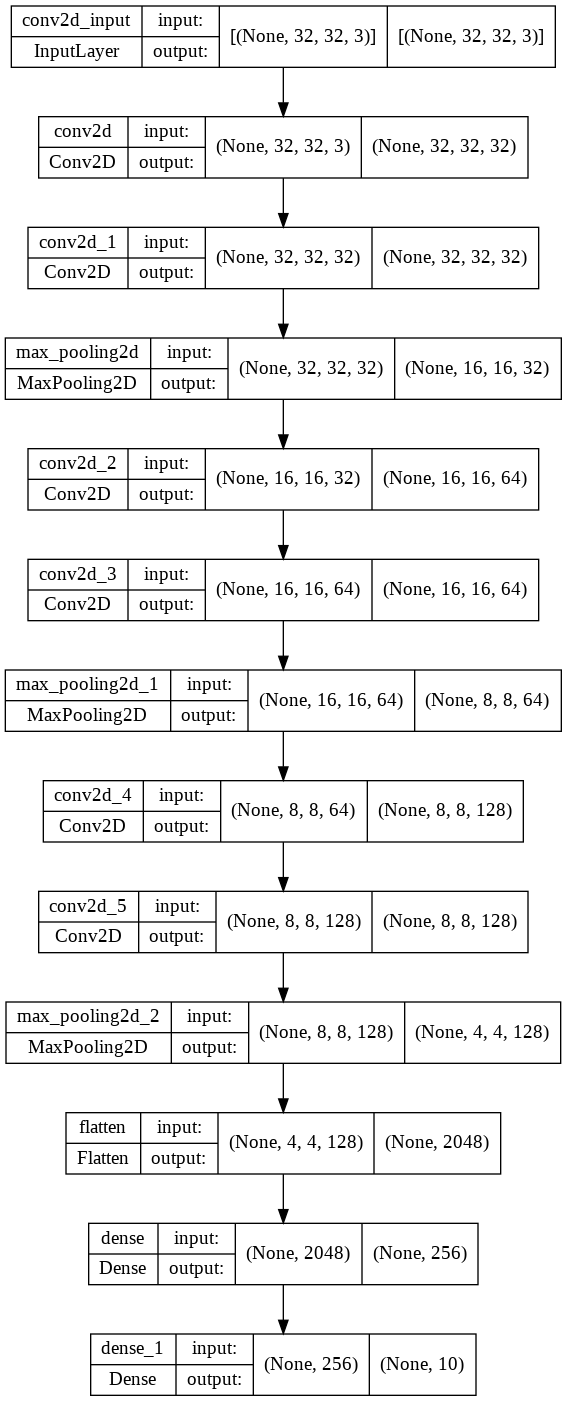

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, './model.png', show_shapes =True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


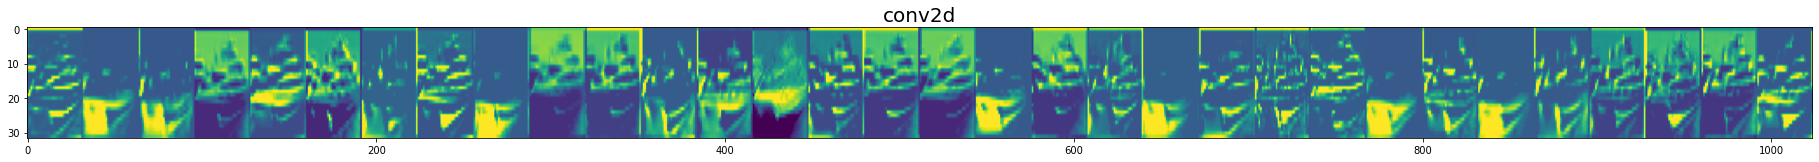

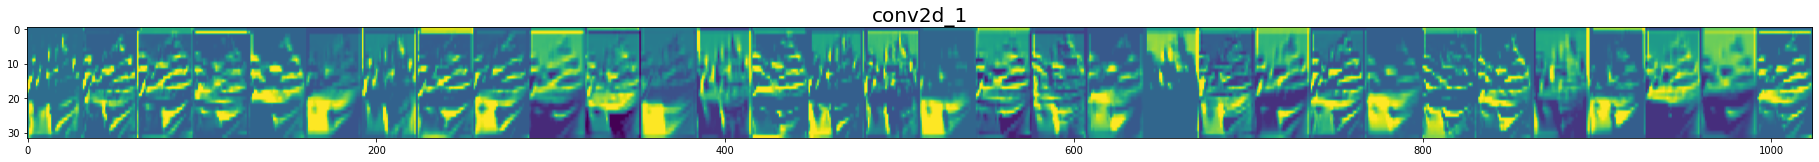

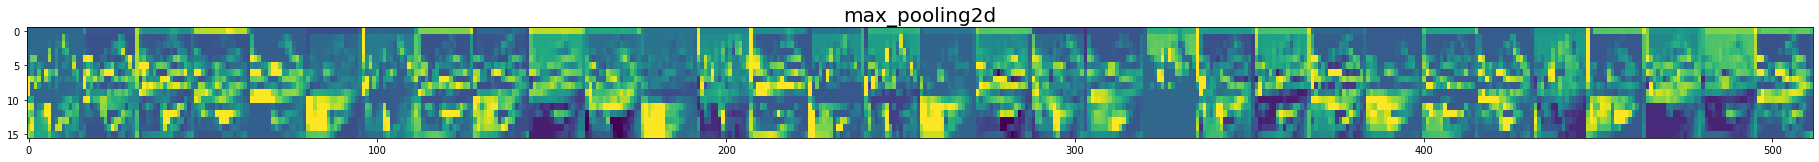

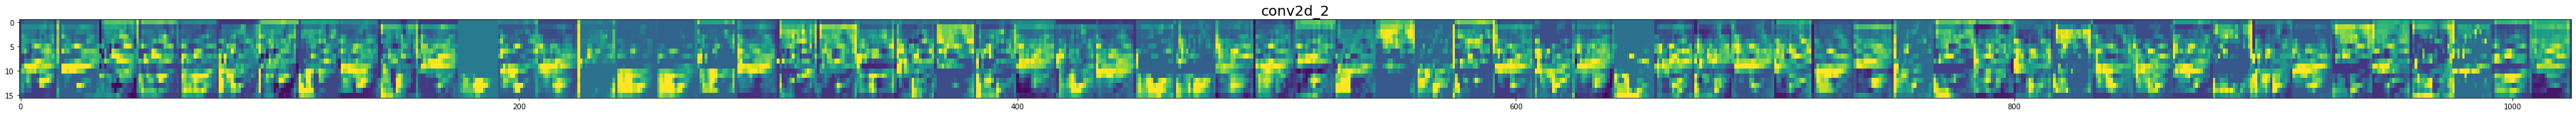

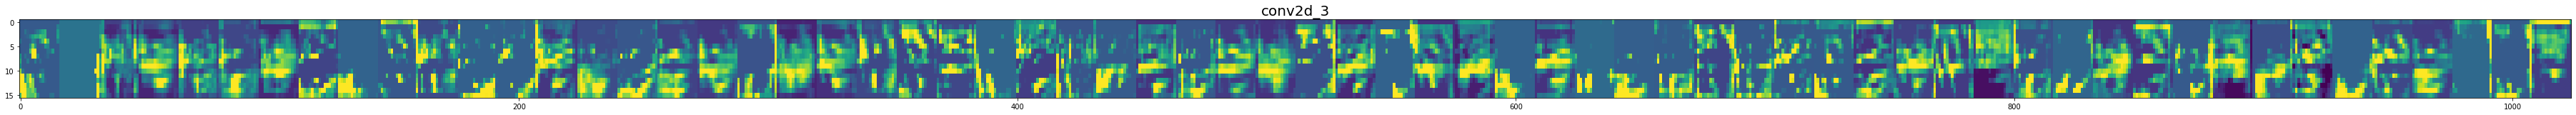

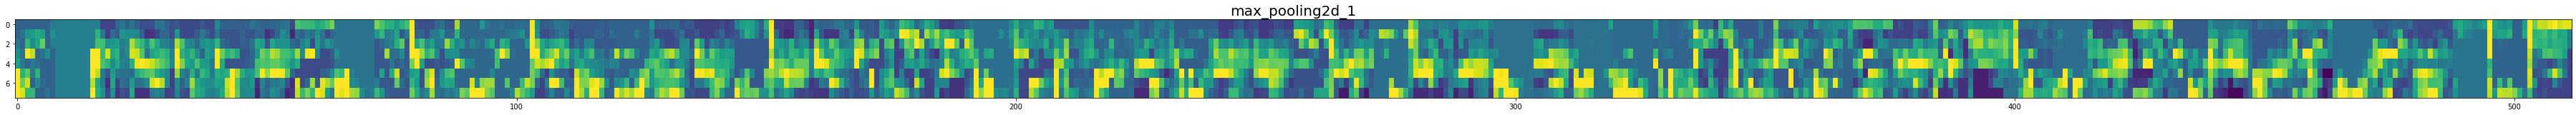

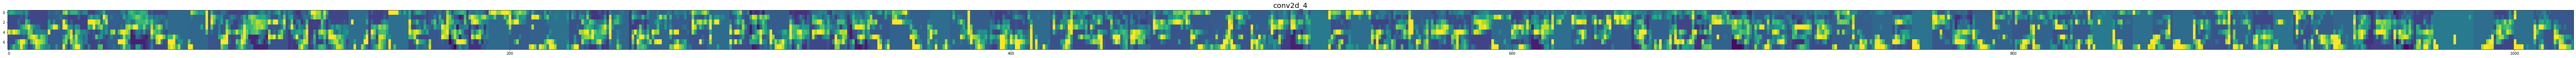

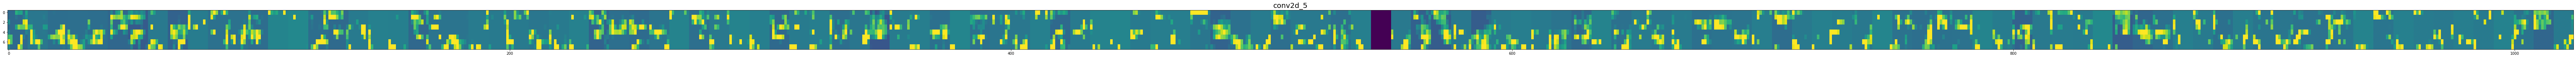

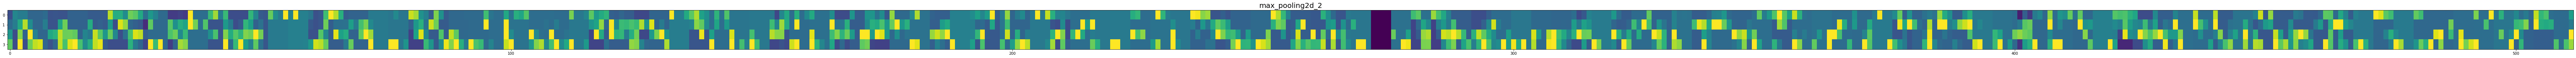

In [ ]:
import matplotlib.pyplot as plt
visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output)

# 테스트셋의 두번째 데이터는 ship
test_img = np.expand_dims(x_test[1], axis = 0)
feature_maps = visual_model.predict(test_img)

for layer_name, feature_map in zip(get_layer_name, feature_maps):
# Dense층은 제외합니다.
  if(len(feature_map.shape)==4):
    img_size = feature_map.shape[1]
    features = feature_map.shape[-1]

    display_grid = np.zeros((img_size, img_size * features))
# 각 특징맵을 display_grid 배열에 이어붙힌다.
    for i in range(features):
      x = feature_map[0,:,:,i]
      x -= x.mean(); x/= x.std()
      x *= 64; x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      display_grid[:,i*img_size : (i + 1) * img_size] = x

    plt.figure(figsize = (features, 2+1./features))
    plt.title(layer_name, fontsize = 20)
    plt.grid(False)
    plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')

## 규제함수 + 드롭아웃 추가

### l2 적용

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2,l1,l1_l2

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 activation = 'relu', kernel_regularizer = l2(0.001))) # 규제함수 추가
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))


model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                 activation = 'relu',kernel_regularizer = l2(0.001))) # 규제함수 추가
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))


model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                 activation = 'relu',kernel_regularizer = l2(0.001))) # 규제함수 추가
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))

# model.add(Dropout(0.2)) # 드롭아웃 추가
model.add(Flatten())
model.add(Dense(256, activation = 'relu',kernel_regularizer = l2(0.001))) # 규제함수 추가
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = Adam(1e-4),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [ ]:
history = model.fit(x_train, y_train,
                    epochs = 20,
                    batch_size = 32,
                    validation_data = (x_val, y_val))

Epoch 1/20
1094/1094 [==============================] - 8s 7ms/step - loss: 2.1200 - acc: 0.4131 - val_loss: 1.8046 - val_acc: 0.5065
Epoch 2/20
1094/1094 [==============================] - 9s 8ms/step - loss: 1.6897 - acc: 0.5428 - val_loss: 1.5533 - val_acc: 0.5846
Epoch 3/20
1094/1094 [==============================] - 7s 7ms/step - loss: 1.4775 - acc: 0.6137 - val_loss: 1.4466 - val_acc: 0.6133
Epoch 4/20
1094/1094 [==============================] - 7s 7ms/step - loss: 1.3341 - acc: 0.6586 - val_loss: 1.3331 - val_acc: 0.6493
Epoch 5/20
1094/1094 [==============================] - 7s 7ms/step - loss: 1.2142 - acc: 0.6961 - val_loss: 1.2612 - val_acc: 0.6752
Epoch 6/20
1094/1094 [==============================] - 9s 8ms/step - loss: 1.1184 - acc: 0.7237 - val_loss: 1.1975 - val_acc: 0.6895
Epoch 7/20
1094/1094 [==============================] - 8s 7ms/step - loss: 1.0333 - acc: 0.7502 - val_loss: 1.1750 - val_acc: 0.7013
Epoch 8/20
1094/1094 [==============================] - 7s 7ms

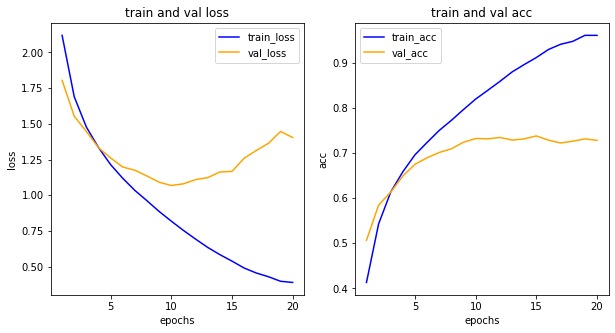

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize = (10,5))
# 학습 및 검증 손실 그리기

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss , color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

### l1 정규화 적용

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2,l1,l1_l2

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 activation = 'relu', kernel_regularizer = l1(0.001))) # 규제함수 추가
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))


model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                 activation = 'relu',kernel_regularizer = l1(0.001))) # 규제함수 추가
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))


model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                 activation = 'relu',kernel_regularizer = l1(0.001))) # 규제함수 추가
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))

# model.add(Dropout(0.2)) # 드롭아웃 추가
model.add(Flatten())
model.add(Dense(256, activation = 'relu',kernel_regularizer = l1(0.001))) # 규제함수 추가
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = Adam(1e-4),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [ ]:
history = model.fit(x_train, y_train,
                    epochs = 20,
                    batch_size = 32,
                    validation_data = (x_val, y_val))

Epoch 1/20
1094/1094 [==============================] - 9s 7ms/step - loss: 7.4586 - acc: 0.3418 - val_loss: 3.6158 - val_acc: 0.3986
Epoch 2/20
1094/1094 [==============================] - 7s 7ms/step - loss: 3.0070 - acc: 0.4207 - val_loss: 2.5945 - val_acc: 0.4321
Epoch 3/20
1094/1094 [==============================] - 7s 7ms/step - loss: 2.4120 - acc: 0.4512 - val_loss: 2.2355 - val_acc: 0.4684
Epoch 4/20
1094/1094 [==============================] - 7s 7ms/step - loss: 2.1584 - acc: 0.4723 - val_loss: 2.0569 - val_acc: 0.4768
Epoch 5/20
1094/1094 [==============================] - 7s 7ms/step - loss: 2.0122 - acc: 0.4845 - val_loss: 1.9196 - val_acc: 0.5033
Epoch 6/20
1094/1094 [==============================] - 7s 7ms/step - loss: 1.9046 - acc: 0.5036 - val_loss: 1.8669 - val_acc: 0.5057
Epoch 7/20
1094/1094 [==============================] - 7s 7ms/step - loss: 1.8235 - acc: 0.5161 - val_loss: 1.7668 - val_acc: 0.5252
Epoch 8/20
1094/1094 [==============================] - 7s 7ms

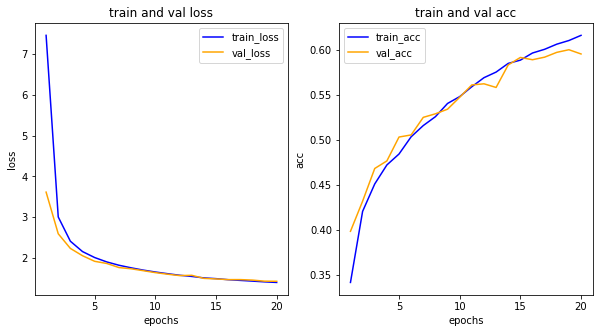

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize = (10,5))
# 학습 및 검증 손실 그리기

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss , color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

#### 드롭아웃 사용

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2,l1,l1_l2

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 activation = 'relu')) # 규제함수 추가
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))


model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                 activation = 'relu')) 
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))


model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))

model.add(Dropout(0.2)) # 드롭아웃 추가
model.add(Flatten())
model.add(Dense(256, activation = 'relu')) 
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = Adam(1e-4),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [ ]:
history = model.fit(x_train, y_train,
                    epochs = 20,
                    batch_size = 32,
                    validation_data = (x_val, y_val))

Epoch 1/20
1094/1094 [==============================] - 8s 7ms/step - loss: 1.6468 - acc: 0.4057 - val_loss: 1.4375 - val_acc: 0.4767
Epoch 2/20
1094/1094 [==============================] - 7s 6ms/step - loss: 1.2859 - acc: 0.5393 - val_loss: 1.1848 - val_acc: 0.5779
Epoch 3/20
1094/1094 [==============================] - 8s 7ms/step - loss: 1.1192 - acc: 0.6020 - val_loss: 1.1061 - val_acc: 0.6076
Epoch 4/20
1094/1094 [==============================] - 7s 6ms/step - loss: 1.0034 - acc: 0.6474 - val_loss: 0.9697 - val_acc: 0.6578
Epoch 5/20
1094/1094 [==============================] - 7s 6ms/step - loss: 0.9055 - acc: 0.6833 - val_loss: 0.9274 - val_acc: 0.6727
Epoch 6/20
1094/1094 [==============================] - 7s 6ms/step - loss: 0.8298 - acc: 0.7106 - val_loss: 0.8769 - val_acc: 0.6889
Epoch 7/20
1094/1094 [==============================] - 8s 7ms/step - loss: 0.7596 - acc: 0.7340 - val_loss: 0.8348 - val_acc: 0.7038
Epoch 8/20
1094/1094 [==============================] - 7s 6ms

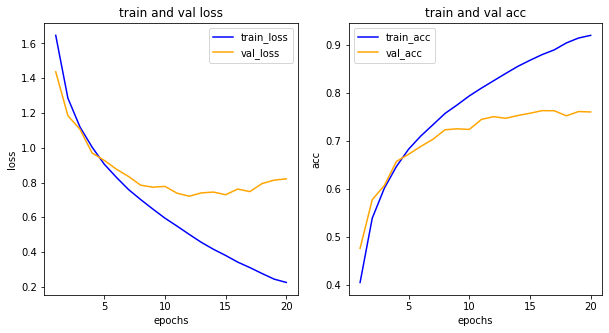

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize = (10,5))
# 학습 및 검증 손실 그리기

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss , color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

### 배치 정규화 사용

### 배치 정규화 사용

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2,l1,l1_l2

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 input_shape = (32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))  


model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))  


model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))  

model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = Adam(1e-4),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [ ]:
history = model.fit(x_train, y_train,
                    epochs = 20,
                    batch_size = 32,
                    validation_data = (x_val, y_val))

Epoch 1/20
1094/1094 [==============================] - 11s 8ms/step - loss: 1.4287 - acc: 0.4901 - val_loss: 1.2362 - val_acc: 0.5551
Epoch 2/20
1094/1094 [==============================] - 9s 8ms/step - loss: 1.0255 - acc: 0.6445 - val_loss: 1.0481 - val_acc: 0.6271
Epoch 3/20
1094/1094 [==============================] - 10s 9ms/step - loss: 0.8220 - acc: 0.7187 - val_loss: 1.0307 - val_acc: 0.6399
Epoch 4/20
1094/1094 [==============================] - 9s 8ms/step - loss: 0.6624 - acc: 0.7785 - val_loss: 1.0429 - val_acc: 0.6471
Epoch 5/20
1094/1094 [==============================] - 10s 9ms/step - loss: 0.5331 - acc: 0.8285 - val_loss: 0.9162 - val_acc: 0.6808
Epoch 6/20
1094/1094 [==============================] - 10s 9ms/step - loss: 0.4125 - acc: 0.8736 - val_loss: 0.9350 - val_acc: 0.6841
Epoch 7/20
1094/1094 [==============================] - 10s 9ms/step - loss: 0.3178 - acc: 0.9087 - val_loss: 0.9783 - val_acc: 0.6838
Epoch 8/20
1094/1094 [==============================] - 9

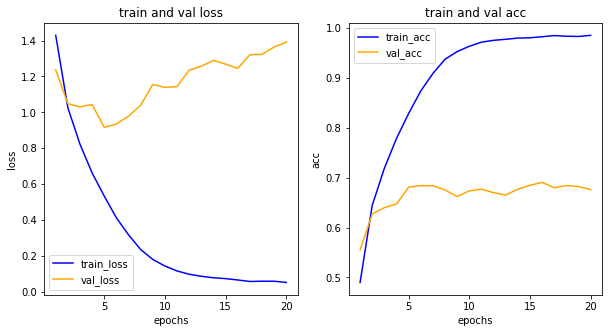

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize = (10,5))
# 학습 및 검증 손실 그리기

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss , color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

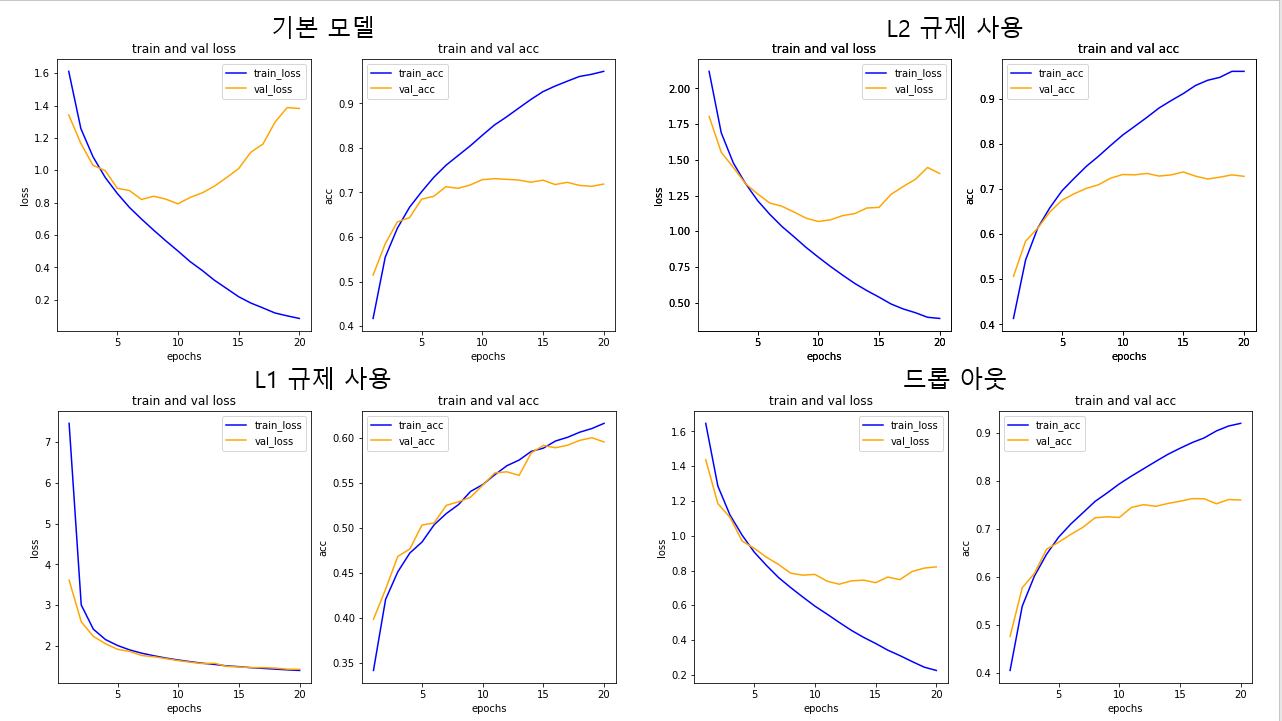

## 데이터 증식

- 데이터 증식을 사용한 성능향상
  - 딥러닝의 고질적인 문제 : 일반화의 해결책, but 근본적으로는 해결 불가

- 데이터 증식의 장점
  - 다양한 데이터를 입력시킴으로서 모델을 더욱 견고하게 만들어 주기 때문에 테스트 시에 더 높은 성능 기대
  - 수집된 데이터가 적은 경우 강력한 힘 -> 일반화

### - 데이터 증식 사용방법
- 케라스는 이를 편리하게 사용할수있도록 이미지 제너레이터를 제공하며 변환 방식은 다음과 같음
  - width_shift_range : 임의의 크기만큼 너비 방향으로 이동
  - hight_''_'' : 임의의 크기만큼 높이 방향으로 이동
  - brightness_range : 밝기조절
  - shear_range : 시계 반대방향으로 밀림강도 조절
  - zoom(확대축소), rotation(회전)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#---------------------------- 이미지 어그멘테이션
train_datagen = ImageDataGenerator(horizontal_flip = True,
                                   vertical_flip = True,
                                   brightness_range = [0.5, 1.5],
                                   zoom_range = 0.2,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 30,
                                   fill_mode = 'nearest')
# fill_mode에는 'constant', 'nearest', 'reflect', 'wrap'
validation_datagent = ImageDataGenerator(rescale = 1./255)

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving googlelogo_color_92x30dp.png to googlelogo_color_92x30dp.png


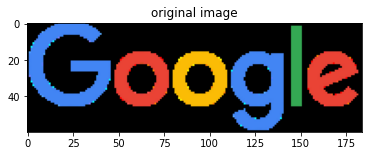

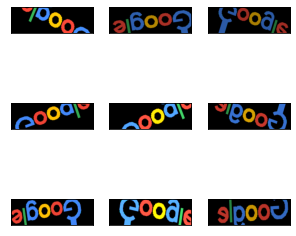

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

test_image = img_to_array(load_img('/content/googlelogo_color_92x30dp.png')).astype(np.uint8)
plt.figure()
plt.title('original image')
plt.imshow(test_image)

test_image = test_image.reshape((1,) + test_image.shape)
train_generator = train_datagen.flow(test_image, batch_size = 1)

plt.figure(figsize = (5,5))
for i in range(9):
  data = next(train_generator)
  image = data[0]
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(np.array(image, dtype = np.uint8))
plt.show()